In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import ttest_ind
import numpy as np
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import calendar

The next cell reads the csvs and excel files from the entire birmingham data

In [2]:
#read csv
birm_unemployment_df=pd.read_csv('../data/Birmingham_Data/Unemployment Rate_Birmingham-Hoover.csv')
birm_crime_north_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_south_df=pd.read_excel('../data/Birmingham_Data/open-data-north-2023.xlsx')
birm_crime_west_df=pd.read_excel('../data/Birmingham_Data/open-data-west-2023.xlsx')
birm_crime_east_df=pd.read_excel('../data/Birmingham_Data/opendataportal-east-2023.xlsx')  

After reading the file, I am using .head() method to returns the first 5 rows of birmingham east file

In [3]:
birm_crime_east_df.head()
#2061 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute,Case Offense Statute Description,Case ORI,Reporting District
0,700,SPRINGVILLE RD,33.608202,-86.686890,35215.0,11/30/2023 18:00:00,13A-8-3,Theft of Property Auto Theft 1st,AL0010200,E230
1,8300,DIVISION AVE,33.571259,-86.720541,35206.0,11/30/2023 15:00:00,13A-8-5,Theft from Residence 4th Degree,AL0010200,E223
2,7700,RUGBY AVE,33.557691,-86.718364,35206.0,11/30/2023 14:00:00,13A-8-3,Theft of Property Auto Theft 1st,AL0010200,E224
3,500,61ST ST S,33.538302,-86.742352,35212.0,11/30/2023 12:00:00,13A-6-138,Domestic Strangulation or Suffocation,AL0010200,E234
4,1600,MONTCLAIR RD,33.525970,-86.721946,35210.0,11/30/2023 11:30:00,13A-8-4.1,Shoplifting 3rd Degree,AL0010200,E220


In [4]:
birm_crime_north_df.head()
#1058 rows × 8 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


I am using .head() method to returns the first 5 rows of birmingham north file

In [5]:
birm_crime_north_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'],
      dtype='object')

I am using .columns to returns the label of each column in the DataFrame

In [6]:
birm_crime_south_df.head()
#1058 rows × 8 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120


I am using .head() method to returns the first 5 rows of birmingham south file

In [7]:
birm_crime_south_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'],
      dtype='object')

I am using .columns to returns the label of each column in the DataFrame

In [8]:
birm_crime_west_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District
0,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Disch Firearm into Occupied Bldg/Veh,W429
1,500,16TH WAY SW,33.490053,-86.862152,35211.0,11/30/2023 23:02:00,Aggravated Assault Non-Family-Gun-2nd Degree,W429
2,600,CANDLE LN,33.541728,-86.865778,35214.0,11/30/2023 21:58:00,Theft from Residence 4th Degree,W439
3,1500,51ST ST,33.483066,-86.890583,35208.0,11/30/2023 17:00:00,Theft of Property Auto Theft 1st,W432
4,1100,4TH AVE W,33.506463,-86.856604,35204.0,11/30/2023 16:00:00,Aggravated Assault Family-Gun-2nd Degree,W430


the .head() method returns the first 5 rows of birmingham west file. 2092 rows × 8 columns. A simple addition of all the rows and columns is 6269

In [9]:
birm_unemployment_df.head(1)

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1


In [10]:
birm_crime_df = pd.concat([birm_crime_north_df, birm_crime_south_df, birm_crime_east_df, birm_crime_west_df], ignore_index=True)
birm_crime_df.head() #6269 rows × 10 columns

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,11/30/2023,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,11/29/2023 18:30:00,Theft by deception,N131,NaN,NaN
4,NaN,6TH AVE W,NaN,NaN,NaN,11/29/2023 13:00:00,Theft from Residence 4th Degree,N120,NaN,NaN


The pd.concat is the most accurate method to join the entired Birmingham dataframe since it returns the total number of rows and retains the column since they have common values. One would assume that i do merge, but the .merge that not return the entire rows, see update on a simple maths some cells above. 

In [11]:
birm_crime_df.columns

Index(['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District',
       'Case Offense Statute', 'Case ORI'],
      dtype='object')

 After joining, i use .columns to returns the label of each column in the DataFrame

merged_df_1 = pd.merge(birm_crime_north_df, birm_crime_south_df, how='inner', on= ['Block', 'Street', 'Case Address Latitude', 'Case Address Longitude',
       'Case Address Zip', 'Case Occurred From Date',
       'Case Offense Statute Description', 'Reporting District'])
merged_df_1

Here i am using .merge to join the entire Birmingham data. The result shows that .concat is the best way to join the entire dataframe instead of merge. the entire row is 1082 rows × 8 columns as against #6269 rows × 10 columns from .merge

In [12]:
#top ten crime in birmingham
top_ten_crime_in_birm=birm_crime_df['Case Offense Statute Description'].value_counts()
top_ten_crime_in_birm.head(10)

Case Offense Statute Description
Theft of Property Auto Theft 1st             1323
Disch Firearm into Occupied Bldg/Veh          502
Burglary (Residence) Force 3rd Degree         458
Miscellaneous Theft-3rd Degree                404
Theft - TOP 2nd Degree                        362
Larceny/Theft-Shoplifting, less than $500     272
Burglary-Residence-No Force-3rd Degree        215
Theft-Firearms-2nd Degree                     175
Domestic Strangulation or Suffocation         167
Larceny/Theft-TOP 2 $500-less than $1500      152
Name: count, dtype: int64

this code identifies and lists the top 10 most common crime descriptions in the birm_crime_df DataFrame, based on the frequency of each description. Of the top ten, "Theft of Property Auto Theft 1st", comes up top with 1323 frequency and "Larceny/Theft-TOP 2 $500-less than $1500" with the least number of times, 152. 

(<Axes: title={'center': 'Top Ten Crime in Birmingham, AL'}, ylabel='Case Offense Statute Description'>,
 None)

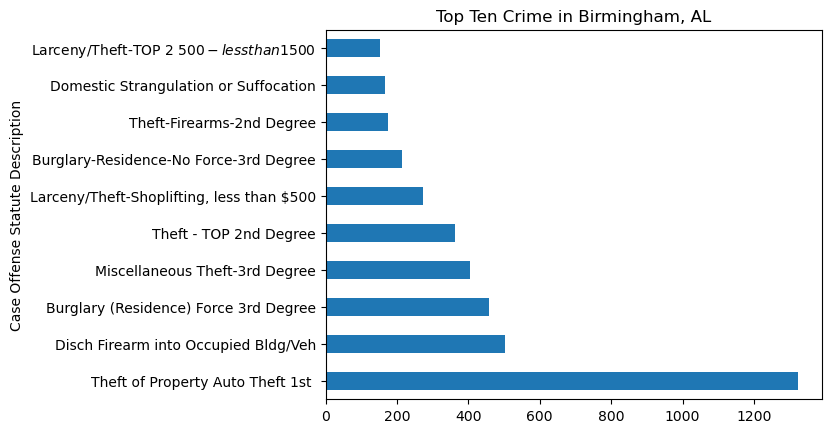

In [13]:
top_ten_crime_in_birm.head(10).plot(kind="barh", title = "Top Ten Crime in Birmingham, AL"), plt.savefig('Top Ten Crime in Birmingham, AL.png', bbox_inches='tight')

Here, I plot a bar plot to display the result of the top ten crime in Birmingham AL, I used plt.savefig to export the png file and "barh" to make it horizontally. 

In [14]:
birm_crime_df.head(2)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,11/30/2023 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,11/30/2023 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN


In [15]:
import calendar

To use the calendar module, I must first import it into your Python script. In the next few codes, i am going to be using the calendar module

In [16]:
#convert to datetime specifying format
birm_crime_df['Case Occurred From Date'] = pd.to_datetime(birm_crime_df['Case Occurred From Date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI
0,NaN,19TH ST N,33.518551,-86.811302,35203.0,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN
1,NaN,26TH ST N,33.553396,-86.818906,35207.0,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN
2,NaN,17TH ST N,33.512548,-86.810036,35203.0,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207.0,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN


here i am converting the "Case Occurred From Date" column to datetime objects. This conversion is necessary since i am working with time-series data and it involves dates and times

In [17]:
birm_crime_df['Case Offense Statute Description'].unique()

array(['Theft-From Public Building-1st Degree',
       'Larceny/Theft-Shoplifting, less than $500',
       'Theft of Property Auto Theft 1st ', 'Theft by deception',
       'Theft from Residence 4th Degree',
       'Miscellaneous Theft-3rd Degree', 'Theft - TOP 2nd Degree',
       'Larceny/Theft-TOP 2 $500-less than $1500',
       'Burglary-Residence-No Force-3rd Degree',
       'Domestic Burglary - 3rd Degree',
       'Burglary (Residence)-Force 1st Degree',
       'Burglary (Residence) Force 3rd Degree',
       'Domestic Strangulation or Suffocation',
       'Aggravated Assault Family-Knife-2nd Degree',
       'Disch Firearm into Occupied Bldg/Veh',
       'Robbery-Business-Gun-1st Degree', 'Theft-Firearms-2nd Degree',
       'Theft from Residence - 3rd Degree',
       'Aggravated Assault Family-Other Weapon-2nd Degree',
       'Theft-Vehicle Parts-4th Degree', 'Theft-From Yards-3rd Degree',
       'Aggravated Assault Non-Family-Knife-2nd Degree',
       'Theft-From Yards-4th Degree'

i want to identify all the distinct values present in the birm_crime_df 

In [18]:
birm_crime_df['Month Occured'] = birm_crime_df['Case Occurred From Date'].dt.month
birm_crime_df['Month Occured'].head()

0    11.0
1    11.0
2     NaN
3    11.0
4    11.0
Name: Month Occured, dtype: float64

i am Extracting the month number and creating 'Month Occured' column, and making it into a month row.

In [19]:
birm_crime_df.tail(3)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured
6266,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211.0,2023-01-01 02:25:00,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN,1.0
6267,1300.0,JERSEY ST,33.498782,-86.924066,35224.0,2023-01-01 00:10:00,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN,1.0
6268,1600.0,BOISE AVE,33.482842,-86.856379,35211.0,2023-01-01 00:01:00,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN,1.0


In [20]:
birm_crime_df['Case Address Zip'].dtype

dtype('float64')

I am trying to figure out the attribute of the ['Case Address Zip'] data type, it is if a float or integer as you would observe the I will convert it to integer in the next cell

In [21]:
birm_crime_df = birm_crime_df.dropna(subset=['Case Address Zip'])
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].astype(int)

Here, i convert ['Case Address Zip'] to integer using .astype and cleaned zipcode column. The rows has the "35211.0	", the "0" at the end of each zip code is cleaned and can look like a normal AL zipcode

In [22]:
birm_crime_df['Case Address Zip'] = birm_crime_df['Case Address Zip'].fillna(0).astype(int)
birm_crime_df['Case Address Zip']

0       35203
1       35207
2       35203
3       35207
5       35203
        ...  
6264    35211
6265    35211
6266    35211
6267    35224
6268    35211
Name: Case Address Zip, Length: 6055, dtype: int64

filling any empty row as NA

In [23]:
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN,11.0
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN,11.0
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN,NaN
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN,11.0


The "Case Address Zip" all look cleaned now. 

In [24]:
num_offense_per_zip=birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].value_counts()
num_offense_per_zip

Case Address Zip  Case Offense Statute Description                 
35020             Theft of Property Auto Theft 1st                     11
                  Disch Firearm into Occupied Bldg/Veh                  4
                  Larceny/Theft-TOP 2 $500-less than $1500              2
                  Burglary-Residence-No Force-3rd Degree                2
                  Burglary (Residence) Force 3rd Degree                 2
                                                                       ..
35235             Robbery-Business-Gun-3rd Degree                       1
35242             Aggravated Assault Family-Other Weapon-2nd Degree     1
35294             Aggravated Assault Family-Gun-1st Degree              1
                  Aggravated Assault Non-Family-Gun-2nd Degree          1
                  Sodomy-With A Woman-Other Weapon-2nd Degree           1
Name: count, Length: 948, dtype: int64

I analyze the df, specifically focusing on the frequency of different types of crimes based on their statute descriptions and grouping these frequencies by zip codes where the crimes occurred

In [25]:
total_offenses_per_zip = birm_crime_df.groupby('Case Address Zip')['Case Offense Statute Description'].count().sort_values(ascending=False).head(15)
total_offenses_per_zip.head

<bound method NDFrame.head of Case Address Zip
35204    780
35206    640
35211    609
35203    591
35208    556
35215    484
35207    420
35212    331
35234    269
35218    254
35214    218
35210    202
35217    147
35235    136
35228     87
Name: Case Offense Statute Description, dtype: int64>

I am performing a data aggregation and sorting operations on a df. For each group (ZIP code), the .count() method is applied to the 'Case Offense Statute Description' column to count the number of offenses recorded in each ZIP code. I now sort resulting Series from the count operation in descending order using the .sort_values() method with the ascending=False parameter. 

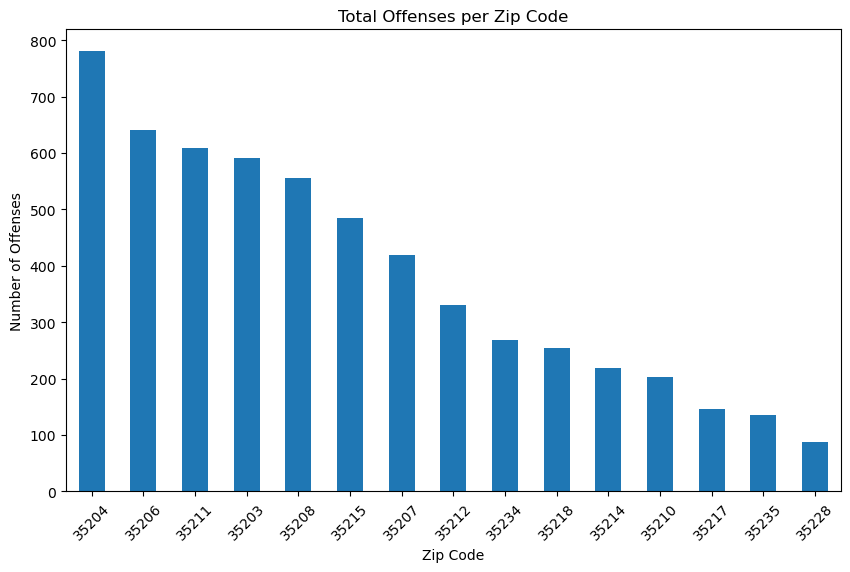

In [26]:
total_offenses_per_zip.plot(kind='bar', figsize=(10, 6))
plt.title('Total Offenses per Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Number of Offenses')
plt.xticks(rotation=45)
plt.savefig('Total Offenses per Zip Code.png', bbox_inches='tight')
plt.show()

I am displaying the plot of my code here. The plot here displays that 35204 has the highest number of crime and 35228 the lowest in Birmingham. 

In [27]:
num_offense_per_zip_df = num_offense_per_zip.reset_index(name='Counts').head(20)
num_offense_per_zip_df

,Case Address Zip,Case Offense Statute Description,Counts
0,35020,Theft of Property Auto Theft 1st,11
1,35020,Disch Firearm into Occupied Bldg/Veh,4
2,35020,Larceny/Theft-TOP 2 $500-less than $1500,2
3,35020,Burglary-Residence-No Force-3rd Degree,2
4,35020,Burglary (Residence) Force 3rd Degree,2
5,35020,Aggravated Assault Family-Gun-1st Degree,1
6,35020,Theft from Residence 4th Degree,1
7,35020,Theft - TOP 2nd Degree,1
8,35020,Miscellaneous Theft-2nd Degree,1
9,35020,Burglary (Residence) Force 2nd Degree,1


In [28]:
birm_crime_df_geo = gpd.GeoDataFrame(birm_crime_df, geometry=gpd.points_from_xy(birm_crime_df['Case Address Longitude'], birm_crime_df['Case Address Latitude']))
birm_crime_df_geo

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured,geometry
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN,11.0,POINT (-86.81130 33.51855)
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN,11.0,POINT (-86.81891 33.55340)
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN,NaN,POINT (-86.81004 33.51255)
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN,11.0,POINT (-86.81789 33.55318)
5,NaN,28TH ST N,33.523155,-86.797087,35203,2023-11-29 12:32:00,Theft by deception,N120,NaN,NaN,11.0,POINT (-86.79709 33.52315)
...,...,...,...,...,...,...,...,...,...,...,...,...
6264,1700.0,PEARSON AVE,33.485909,-86.863144,35211,2023-01-01 03:00:00,Domestic Strangulation or Suffocation,W427,NaN,NaN,1.0,POINT (-86.86314 33.48591)
6265,1700.0,PEARSON AVE,33.485909,-86.863144,35211,2023-01-01 03:00:00,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN,NaN,1.0,POINT (-86.86314 33.48591)
6266,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211,2023-01-01 02:25:00,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN,1.0,POINT (-86.85486 33.47165)
6267,1300.0,JERSEY ST,33.498782,-86.924066,35224,2023-01-01 00:10:00,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN,1.0,POINT (-86.92407 33.49878)


I am using geopandas to convert long and lat to points

In [30]:
birm_crime_df_geo['geometry']

0       POINT (-86.81130 33.51855)
1       POINT (-86.81891 33.55340)
2       POINT (-86.81004 33.51255)
3       POINT (-86.81789 33.55318)
5       POINT (-86.79709 33.52315)
                   ...            
6264    POINT (-86.86314 33.48591)
6265    POINT (-86.86314 33.48591)
6266    POINT (-86.85486 33.47165)
6267    POINT (-86.92407 33.49878)
6268    POINT (-86.85638 33.48284)
Name: geometry, Length: 6055, dtype: geometry

<Axes: >

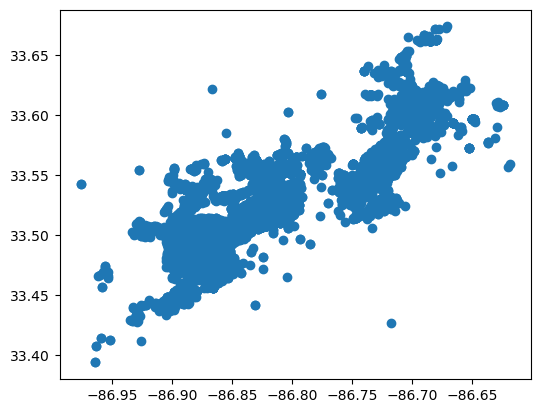

In [60]:
birm_crime_df_geo.plot()

i created this yesterday, not part of the original project that i did. Just messing with the code

In [32]:
birm_crime_df_geo = birm_crime_df_geo[['Case Address Zip', 'Case Offense Statute Description', 'geometry']]#use the double bracket to drop the column instead of the .drop, they do the same thing
birm_crime_df_geo.head()

,Case Address Zip,Case Offense Statute Description,geometry
0,35203,Theft-From Public Building-1st Degree,POINT (-86.81130 33.51855)
1,35207,"Larceny/Theft-Shoplifting, less than $500",POINT (-86.81891 33.55340)
2,35203,Theft of Property Auto Theft 1st,POINT (-86.81004 33.51255)
3,35207,Theft by deception,POINT (-86.81789 33.55318)
5,35203,Theft by deception,POINT (-86.79709 33.52315)


In [34]:
# crime_count_per_zip = gpd.sjoin(bus_geo, zipcodes, predicate = 'within')
crime_count_per_zip= birm_crime_df_geo['Case Address Zip'].value_counts()
crime_count_per_zip

Case Address Zip
35204    780
35206    640
35211    609
35203    591
35208    556
35215    484
35207    420
35212    331
35234    269
35218    254
35214    218
35210    202
35217    147
35235    136
35221     87
35228     87
35224     77
35213     50
35020     28
35222     26
35233     13
35061     12
35205      7
35064      7
35209      6
35223      4
35294      3
35068      3
35118      2
35173      2
35060      2
35242      1
35117      1
Name: count, dtype: int64

In [36]:
birm_crime_df_geo['Case Address Zip'].dtypes

dtype('int64')

In [39]:
birm_crime_df_geo['Case Address Zip'].astype(str)

0       35203
1       35207
2       35203
3       35207
5       35203
        ...  
6264    35211
6265    35211
6266    35211
6267    35224
6268    35211
Name: Case Address Zip, Length: 6055, dtype: object

In [40]:
crime_count_per_zip.dtypes

dtype('int64')

In [111]:
# #Offenses per Zip Code 
# num_offense_per_zip_df.pivot(index='Case Address Zip', columns='Case Offense Statute Description', values='Counts').plot(kind='bar', stacked=True, figsize=(10, 6))

# plt.title('Offenses per Zip Code by Offense Type')
# plt.xlabel('Zip Code')
# plt.ylabel('Number of Offenses')
# plt.xticks(rotation=45)
# plt.legend(title='Offense Type')
# plt.savefig('Offenses per Zip Code by Offense Type.png', bbox_inches='tight')
# plt.show()

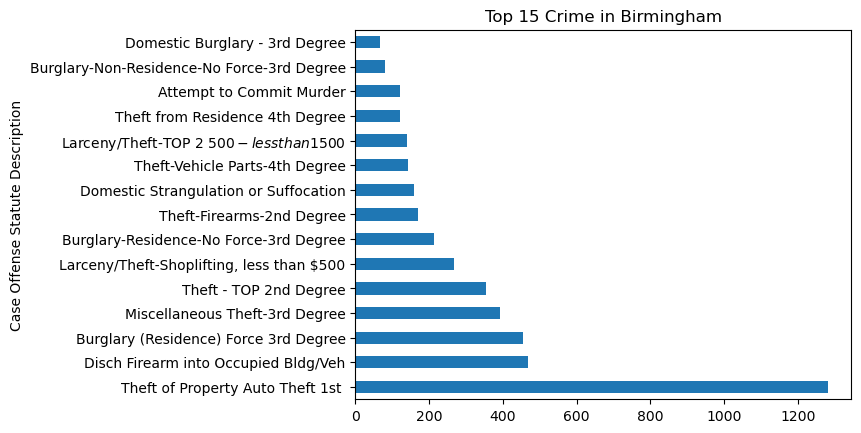

In [63]:
top_15_crimes_in_birm = birm_crime_df['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)
top_15_crimes_in_birm.plot(kind="barh", title = "Top 15 Crime in Birmingham")
plt.savefig('Top 15 Crime in Birmingham.png', bbox_inches='tight')

This plot displays the top 15 crime in Birnmigham with Theft of Property Auto theft as the highest and Domestic Burglary as the lowest. 

In [64]:
birm_crime_df.tail(6)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured
6263,1500.0,MATT LEONARD DR SW,33.464267,-86.854970,35211,2023-01-01 05:20:00,Auto Theft and Sale-1st Degree,W422,NaN,NaN,1.0
6264,1700.0,PEARSON AVE,33.485909,-86.863144,35211,2023-01-01 03:00:00,Domestic Strangulation or Suffocation,W427,NaN,NaN,1.0
6265,1700.0,PEARSON AVE,33.485909,-86.863144,35211,2023-01-01 03:00:00,Sodomy-With A Woman-Domestic Violence-1st Degree,W427,NaN,NaN,1.0
6266,1500.0,ARTHUR SHORES DR,33.471651,-86.854865,35211,2023-01-01 02:25:00,Aggravated Assault Family-Gun-1st Degree,W422,NaN,NaN,1.0
6267,1300.0,JERSEY ST,33.498782,-86.924066,35224,2023-01-01 00:10:00,Disch Firearm into Occupied Bldg/Veh,W437,NaN,NaN,1.0
6268,1600.0,BOISE AVE,33.482842,-86.856379,35211,2023-01-01 00:01:00,Disch Firearm into Occupied Bldg/Veh,W424,NaN,NaN,1.0


In [65]:
#number of crime per street
top_crime_per_street=birm_crime_df.groupby(['Street', 'Case Offense Statute Description'])['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)
top_crime_per_street

Street              Case Offense Statute Description         
MONTCLAIR RD        Larceny/Theft-Shoplifting, less than $500    77
1ST AVE N           Theft of Property Auto Theft 1st             40
2ND AVE N           Theft of Property Auto Theft 1st             23
3RD AVE N           Theft of Property Auto Theft 1st             20
BESSEMER RD         Theft of Property Auto Theft 1st             19
1ST AVE N           Miscellaneous Theft-3rd Degree               17
5TH AVE N           Theft of Property Auto Theft 1st             16
MONTCLAIR RD        Theft of Property Auto Theft 1st             16
MESSER AIRPORT HWY  Theft of Property Auto Theft 1st             13
PARKWAY E           Theft of Property Auto Theft 1st             13
1ST AVE S           Theft of Property Auto Theft 1st             12
REPUBLIC ST         Theft - TOP 2nd Degree                       12
2ND AVE N           Theft-Firearms-2nd Degree                    12
3RD AVE N           Theft-Firearms-2nd Degree         

displaying the nuber of crime per street and the type of crime, Montclair road has Larceny/Theft-Shoplifting, less than $500 as 77 count and 2nd Ave has "Theft - TOP 2nd Degree" as one of the lowest with 12 counts 

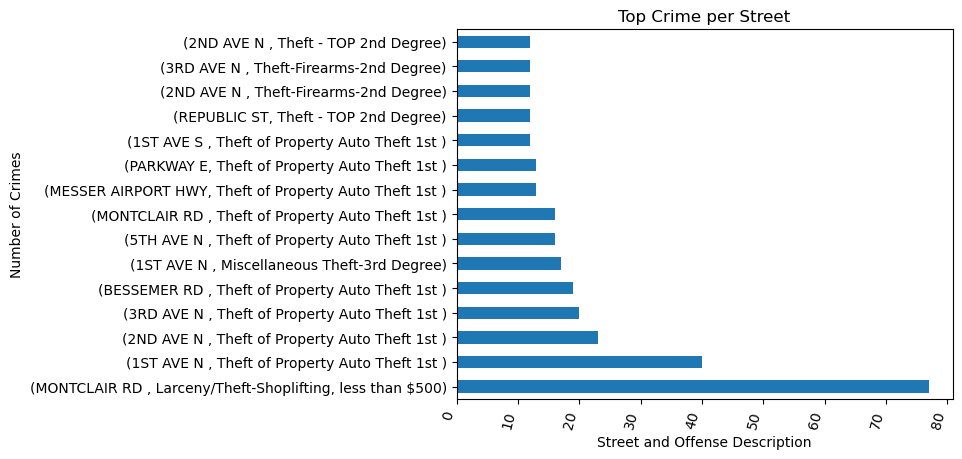

In [66]:
#visualizing the number of crime per street
ax = top_crime_per_street.plot.barh()
ax.set_title('Top Crime per Street')
ax.set_xlabel('Street and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.xticks(rotation=75, ha='right')
plt.savefig('Birmingham Top Crime per Street.png', bbox_inches='tight')
plt.show()

here is a visualization of the code above

In [67]:
birm_crime_df['Time_Occured'] = birm_crime_df['Case Occurred From Date'].dt.time
birm_crime_df['Time_Occured']

0       12:00:00
1       11:45:00
2            NaT
3       18:30:00
5       12:32:00
          ...   
6264    03:00:00
6265    03:00:00
6266    02:25:00
6267    00:10:00
6268    00:01:00
Name: Time_Occured, Length: 6055, dtype: object

when does crime happen most. i also converted the 'Case Occurred From Date' to date time which enables me to get the time when crime occurs most. 

In [68]:
birm_crime_df.head(4)

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured,Time_Occured
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN,11.0,12:00:00
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN,11.0,11:45:00
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN,NaN,NaT
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN,11.0,18:30:00


In [70]:
times_crimes_occured_most=birm_crime_df.groupby(['Time_Occured', 'Case Offense Statute Description'])['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)

In [71]:
times_crimes_occured_most

Time_Occured  Case Offense Statute Description     
12:00:00      Theft of Property Auto Theft 1st         53
22:00:00      Theft of Property Auto Theft 1st         51
20:00:00      Theft of Property Auto Theft 1st         48
23:00:00      Theft of Property Auto Theft 1st         46
21:00:00      Theft of Property Auto Theft 1st         42
18:00:00      Theft of Property Auto Theft 1st         38
08:00:00      Theft of Property Auto Theft 1st         37
17:00:00      Theft of Property Auto Theft 1st         37
19:00:00      Theft of Property Auto Theft 1st         36
12:00:00      Theft - TOP 2nd Degree                   35
              Miscellaneous Theft-3rd Degree           34
16:00:00      Theft of Property Auto Theft 1st         32
01:00:00      Theft of Property Auto Theft 1st         31
12:00:00      Burglary (Residence) Force 3rd Degree    30
17:00:00      Burglary (Residence) Force 3rd Degree    27
Name: count, dtype: int64

On this cell, it appears that "Theft of Property Auto Theft 1st" happen most of the time with the time range most of the time from 22-23:00

<Axes: title={'center': 'Most Crime Events by Day'}, ylabel='Time_Occured,Case Offense Statute Description'>

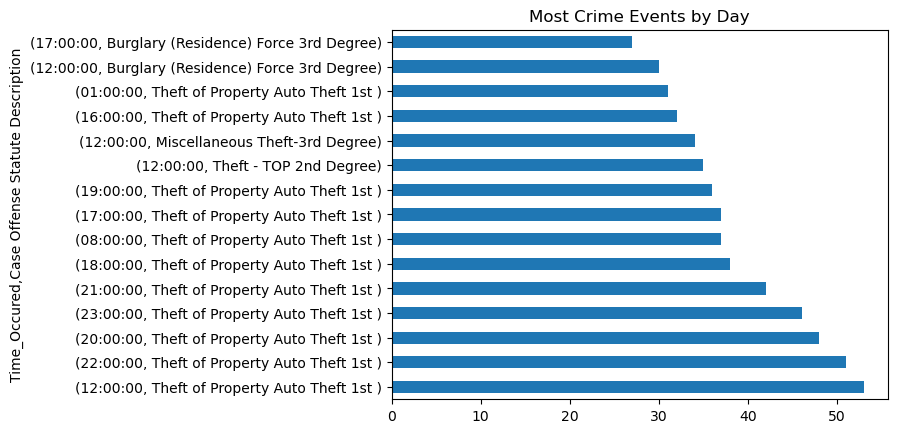

In [72]:
times_crimes_occured_most.plot(kind = 'barh', title ='Most Crime Events by Day')

In [73]:
birm_crime_df['Month Occured'].unique()

array([11., nan, 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [74]:
#convert number to month
birm_crime_df['Month Occured'] = birm_crime_df['Month Occured'].apply(lambda x: calendar.month_name[int(x)] if pd.notnull(x) else x)

remember that i have already converted the months to number, and here i am changing the number months to names, like jan and etc. 

In [76]:
birm_crime_df['Month Occured']

0       November
1       November
2            NaN
3       November
5       November
          ...   
6264     January
6265     January
6266     January
6267     January
6268     January
Name: Month Occured, Length: 6055, dtype: object

In [77]:
birm_crime_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured,Time_Occured
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN,November,12:00:00
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN,November,11:45:00
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN,NaN,NaT
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN,November,18:30:00
5,NaN,28TH ST N,33.523155,-86.797087,35203,2023-11-29 12:32:00,Theft by deception,N120,NaN,NaN,November,12:32:00


In [78]:
#Replace the month with type abbreviations. 
birm_crime_df['Month Occured']
def update_month(abrv):
    birm_crime_df['Month Occured']=birm_crime_df['Month Occured'].map(abrv)
    return birm_crime_df
abrv={'January': "Jan",
        'February': "Feb",
        'March': "Mar",
        'April': "Apr",
        'May': "May",
        'June': "Jun",
        'July': "Jul",
        'August': "Aug",
        'September': "Sep",
        'October': "Oct",
        'November': "Nov",
        'December': "Dec"}
birm_crime_df = update_month(abrv)
birm_crime_df.head()

,Block,Street,Case Address Latitude,Case Address Longitude,Case Address Zip,Case Occurred From Date,Case Offense Statute Description,Reporting District,Case Offense Statute,Case ORI,Month Occured,Time_Occured
0,NaN,19TH ST N,33.518551,-86.811302,35203,2023-11-30 12:00:00,Theft-From Public Building-1st Degree,N122,NaN,NaN,Nov,12:00:00
1,NaN,26TH ST N,33.553396,-86.818906,35207,2023-11-30 11:45:00,"Larceny/Theft-Shoplifting, less than $500",N131,NaN,NaN,Nov,11:45:00
2,NaN,17TH ST N,33.512548,-86.810036,35203,NaT,Theft of Property Auto Theft 1st,N122,NaN,NaN,NaN,NaT
3,NaN,31ST AVE N,33.553181,-86.817887,35207,2023-11-29 18:30:00,Theft by deception,N131,NaN,NaN,Nov,18:30:00
5,NaN,28TH ST N,33.523155,-86.797087,35203,2023-11-29 12:32:00,Theft by deception,N120,NaN,NaN,Nov,12:32:00


i am creating a define function that would be reusable that performs the name change from {'January': "Jan",}

In [79]:
birm_crime_df['Month Occured'].unique()

array(['Nov', nan, 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar',
       'Feb', 'Jan'], dtype=object)

In [80]:
crime_counts_by_month = birm_crime_df.groupby(['Month Occured', 'Case Offense Statute Description']).size().reset_index(name='Count')
crime_counts_by_month

,Month Occured,Case Offense Statute Description,Count
0,Apr,Aggravated Assault Family-Gun-2nd Degree,6
1,Apr,Aggravated Assault Family-Knife-2nd Degree,1
2,Apr,Aggravated Assault Family-Other Weapon,1
3,Apr,Aggravated Assault Family-Other Weapon-2nd Degree,5
4,Apr,Aggravated Assault Non-Family-Gun-2nd Degree,3
...,...,...,...
711,Sep,Theft-Other Vehicle-1st Degree,2
712,Sep,Theft-Vehicle Parts-1st Degree,3
713,Sep,Theft-Vehicle Parts-3rd Degree,1
714,Sep,Theft-Vehicle Parts-4th Degree,4


Here i am performing a group-by operation on the birm_crime_df, grouping by two columns: 'Month Occured' and 'Case Offense Statute Description'. After grouping, i want to count the number of occurrences within each group. This is achieved by using the .size() method, which counts the number of elements in each group. The .reset_index(name='Count') part of the code then converts the resulting Series into a DataFrame and renames the column containing the counts to 'Count'. 

In [81]:
most_crime_per_month = birm_crime_df.groupby('Month Occured')['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15)

In [82]:
most_crime_per_month

Month Occured  Case Offense Statute Description     
Aug            Theft of Property Auto Theft 1st         160
Oct            Theft of Property Auto Theft 1st         143
Jul            Theft of Property Auto Theft 1st         142
Nov            Theft of Property Auto Theft 1st         134
Sep            Theft of Property Auto Theft 1st         134
Jun            Theft of Property Auto Theft 1st         111
Mar            Theft of Property Auto Theft 1st         102
May            Theft of Property Auto Theft 1st          94
Jan            Theft of Property Auto Theft 1st          77
Feb            Theft of Property Auto Theft 1st          65
Apr            Theft of Property Auto Theft 1st          63
Jun            Disch Firearm into Occupied Bldg/Veh      60
Jul            Disch Firearm into Occupied Bldg/Veh      55
Jun            Miscellaneous Theft-3rd Degree            54
Sep            Burglary (Residence) Force 3rd Degree     54
Name: count, dtype: int64

here, i am looking at the most crime per month, just like i did a groupby operation, like the cell above, i am doing the same here, but groupd by ('Month Occured'). i want to identify and display the top 15 most frequent crime types that occurred each month within the df

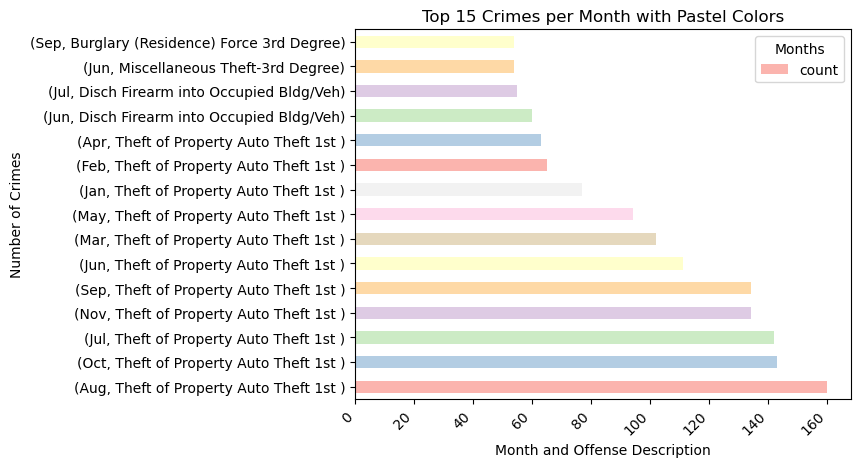

In [83]:
colors = plt.cm.Pastel1.colors
#Using pastel color scheme
ax = most_crime_per_month.plot.barh(color=[colors[i % len(colors)] for i in range(len(most_crime_per_month))])
ax.set_title('Top 15 Crimes per Month with Pastel Colors')
ax.set_xlabel('Month and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.legend(title='Months')
plt.xticks(rotation=45, ha='right')
plt.savefig('Birmingham Top 15 Crimes per Month with Pastel Colors.png', bbox_inches='tight')
plt.show()

i now visualize the code here

In [84]:
most_crime_by_time = birm_crime_df.groupby('Time_Occured')['Case Offense Statute Description'].value_counts().sort_values(ascending=False).head(15) 
most_crime_by_time

Time_Occured  Case Offense Statute Description     
12:00:00      Theft of Property Auto Theft 1st         53
22:00:00      Theft of Property Auto Theft 1st         51
20:00:00      Theft of Property Auto Theft 1st         48
23:00:00      Theft of Property Auto Theft 1st         46
21:00:00      Theft of Property Auto Theft 1st         42
18:00:00      Theft of Property Auto Theft 1st         38
08:00:00      Theft of Property Auto Theft 1st         37
17:00:00      Theft of Property Auto Theft 1st         37
19:00:00      Theft of Property Auto Theft 1st         36
12:00:00      Theft - TOP 2nd Degree                   35
              Miscellaneous Theft-3rd Degree           34
16:00:00      Theft of Property Auto Theft 1st         32
01:00:00      Theft of Property Auto Theft 1st         31
12:00:00      Burglary (Residence) Force 3rd Degree    30
17:00:00      Burglary (Residence) Force 3rd Degree    27
Name: count, dtype: int64

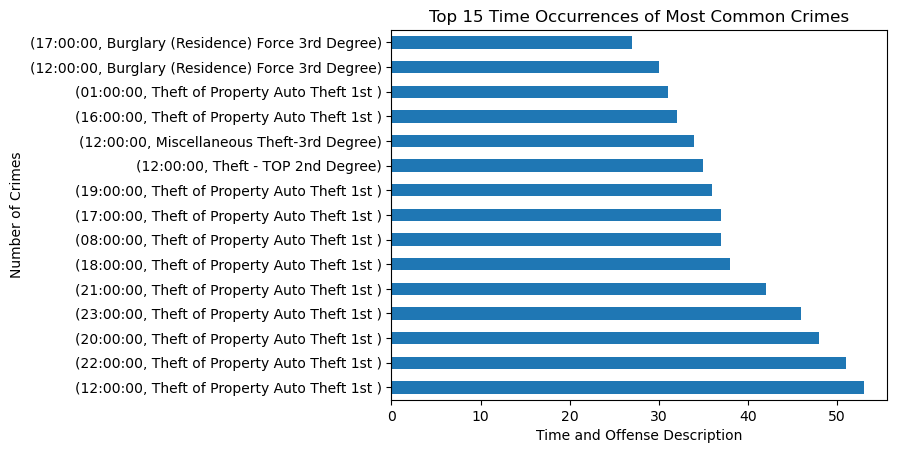

In [85]:
ax = most_crime_by_time.plot.barh()
ax.set_title('Top 15 Time Occurrences of Most Common Crimes')
ax.set_xlabel('Time and Offense Description')
ax.set_ylabel('Number of Crimes')
plt.savefig('Birmingham Top 15 Time Occurrences of Most Common Crimes.png', bbox_inches='tight')
plt.show()

In [86]:
crime_count_by_Month = birm_crime_df.groupby('Month Occured').size()
crime_count_by_Month

Month Occured
Apr    468
Aug    583
Feb    437
Jan    549
Jul    588
Jun    609
Mar    484
May    554
Nov    495
Oct    556
Sep    532
dtype: int64

The code identifies the crime count by each month and counts the number of occurance

In [87]:
crime_count_by_Month_df = crime_count_by_Month.reset_index(name='Crime Count')
crime_count_by_Month_df

,Month Occured,Crime Count
0,Apr,468
1,Aug,583
2,Feb,437
3,Jan,549
4,Jul,588
5,Jun,609
6,Mar,484
7,May,554
8,Nov,495
9,Oct,556


Here, i create a df to create a column "Month Occured" and "Crime Count"

In [88]:
birm_unemployment_df.head(1)

,Series ID,Year,Period,Label,Value
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1


runing the unemployment data

In [89]:
birm_unemployment_df[['Year', 'Month']] = birm_unemployment_df['Label'].str.split(' ', expand=True)
birm_unemployment_df.head()

,Series ID,Year,Period,Label,Value,Month
0,LAUMT011382000000003,2021,M01,2021 Jan,4.1,Jan
1,LAUMT011382000000003,2021,M02,2021 Feb,3.8,Feb
2,LAUMT011382000000003,2021,M03,2021 Mar,3.4,Mar
3,LAUMT011382000000003,2021,M04,2021 Apr,3.0,Apr
4,LAUMT011382000000003,2021,M05,2021 May,2.9,May


This code extracts the month information from a column named "Label" and stores these values into a new column named  "Month". It then displays the first few rows of the modified DataFrame.

In [90]:
birm_unemployment_df.rename(columns={'Value': 'Unemployed Population'}, inplace=True)
birm_unemployment_df.tail(5)

,Series ID,Year,Period,Label,Unemployed Population,Month
31,LAUMT011382000000003,2023,M08,2023 Aug,2.3,Aug
32,LAUMT011382000000003,2023,M09,2023 Sep,2.3,Sep
33,LAUMT011382000000003,2023,M10,2023 Oct,2.2,Oct
34,LAUMT011382000000003,2023,M11,2023 Nov,2.3,Nov
35,LAUMT011382000000003,2023,M12,2023 Dec,2.4,Dec


This code renames the Value column to Unemployed Population and stores these values into new column named "Unemployed Population". It then displays the tail of the modified df

In [93]:
birm_unemployment_df_2023 = birm_unemployment_df[birm_unemployment_df['Year'] == "2023"]
birm_unemployment_df_2023

,Series ID,Year,Period,Label,Unemployed Population,Month
24,LAUMT011382000000003,2023,M01,2023 Jan,2.3,Jan
25,LAUMT011382000000003,2023,M02,2023 Feb,2.2,Feb
26,LAUMT011382000000003,2023,M03,2023 Mar,1.8,Mar
27,LAUMT011382000000003,2023,M04,2023 Apr,1.6,Apr
28,LAUMT011382000000003,2023,M05,2023 May,2.0,May
29,LAUMT011382000000003,2023,M06,2023 Jun,2.5,Jun
30,LAUMT011382000000003,2023,M07,2023 Jul,2.1,Jul
31,LAUMT011382000000003,2023,M08,2023 Aug,2.3,Aug
32,LAUMT011382000000003,2023,M09,2023 Sep,2.3,Sep
33,LAUMT011382000000003,2023,M10,2023 Oct,2.2,Oct


Here, i am extracting the year 2023, that means, i am looking for when the year =2023, because the birmingham crime data only has year as 2023

In [94]:
birm_unemployment_df_2023=birm_unemployment_df_2023[['Year', 'Unemployed Population', 'Month']]
birm_unemployment_df_2023.head()

,Year,Unemployed Population,Month
24,2023,2.3,Jan
25,2023,2.2,Feb
26,2023,1.8,Mar
27,2023,1.6,Apr
28,2023,2.0,May


I am isolating specific columns of interest from the df ['Year', 'Unemployed Population', 'Month'] and displaying the first few rows of the resulting dataset.  

In [95]:
birm_unemployment_df_month = birm_unemployment_df_2023[['Unemployed Population', 'Month']]
birm_unemployment_df_month

,Unemployed Population,Month
24,2.3,Jan
25,2.2,Feb
26,1.8,Mar
27,1.6,Apr
28,2.0,May
29,2.5,Jun
30,2.1,Jul
31,2.3,Aug
32,2.3,Sep
33,2.2,Oct


I am doing almost the same thing here as above, isolating specific columns of interest from the df [Unemployed Population', 'Month'] and displaying the first few rows of the resulting dataset.  

In [99]:
#reset index
birm_unemployment_df_month.reset_index(inplace=True, drop=True)
birm_unemployment_df_month.head(12)

,Unemployed Population,Month
0,2.3,Jan
1,2.2,Feb
2,1.8,Mar
3,1.6,Apr
4,2.0,May
5,2.5,Jun
6,2.1,Jul
7,2.3,Aug
8,2.3,Sep
9,2.2,Oct


reseting index

In [100]:
crime_unemployment_year = pd.merge(birm_unemployment_df_month, crime_count_by_Month_df,left_on='Month', right_on='Month Occured', how='outer')
crime_unemployment_year

,Unemployed Population,Month,Month Occured,Crime Count
0,2.3,Jan,Jan,549.0
1,2.2,Feb,Feb,437.0
2,1.8,Mar,Mar,484.0
3,1.6,Apr,Apr,468.0
4,2.0,May,May,554.0
5,2.5,Jun,Jun,609.0
6,2.1,Jul,Jul,588.0
7,2.3,Aug,Aug,583.0
8,2.3,Sep,Sep,532.0
9,2.2,Oct,Oct,556.0


merge birm_unemployment_df_month and crime_count_by_Month_df

In [101]:
crime_unemployment_year=crime_unemployment_year[['Unemployed Population','Month','Crime Count']]
crime_unemployment_year

,Unemployed Population,Month,Crime Count
0,2.3,Jan,549.0
1,2.2,Feb,437.0
2,1.8,Mar,484.0
3,1.6,Apr,468.0
4,2.0,May,554.0
5,2.5,Jun,609.0
6,2.1,Jul,588.0
7,2.3,Aug,583.0
8,2.3,Sep,532.0
9,2.2,Oct,556.0


This code shows the number of crime by per in relation with the number of unemployed. One thing is clear, there is the high crime count despite the number of unemployed. 

In [102]:
avg_crime_per_month=crime_unemployment_year.groupby('Month')['Crime Count'].mean().dropna()
avg_crime_per_month

Month
Apr    468.0
Aug    583.0
Feb    437.0
Jan    549.0
Jul    588.0
Jun    609.0
Mar    484.0
May    554.0
Nov    495.0
Oct    556.0
Sep    532.0
Name: Crime Count, dtype: float64

The average crime count per month, on an average, June has the highest number of crime count, followed by July while february is the lowest

(<Axes: title={'center': 'Average Crime Count Month'}, xlabel='Month', ylabel='Crime Count'>,
 None)

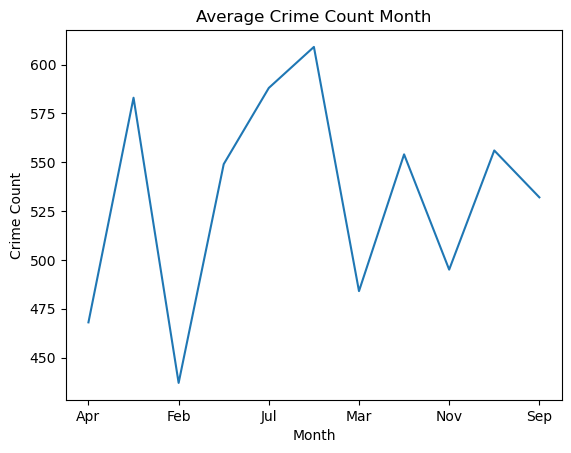

In [103]:
avg_crime_per_month.plot(kind="line", xlabel='Month', ylabel='Crime Count', title = "Average Crime Count Month"), plt.savefig('Average Crime Count Month.png', bbox_inches='tight')

The line graph demonstrates the crime count per month

In [105]:
avg_count_per_unemployment=crime_unemployment_year.groupby('Crime Count')['Unemployed Population'].mean() 
avg_count_per_unemployment

Crime Count
437.0    2.2
468.0    1.6
484.0    1.8
495.0    2.3
532.0    2.3
549.0    2.3
554.0    2.0
556.0    2.2
583.0    2.3
588.0    2.1
609.0    2.5
Name: Unemployed Population, dtype: float64

In [ ]:
birm_crime_df.to_csv('birmingham_crime.csv')

i am exporting to csv to use for my tableau